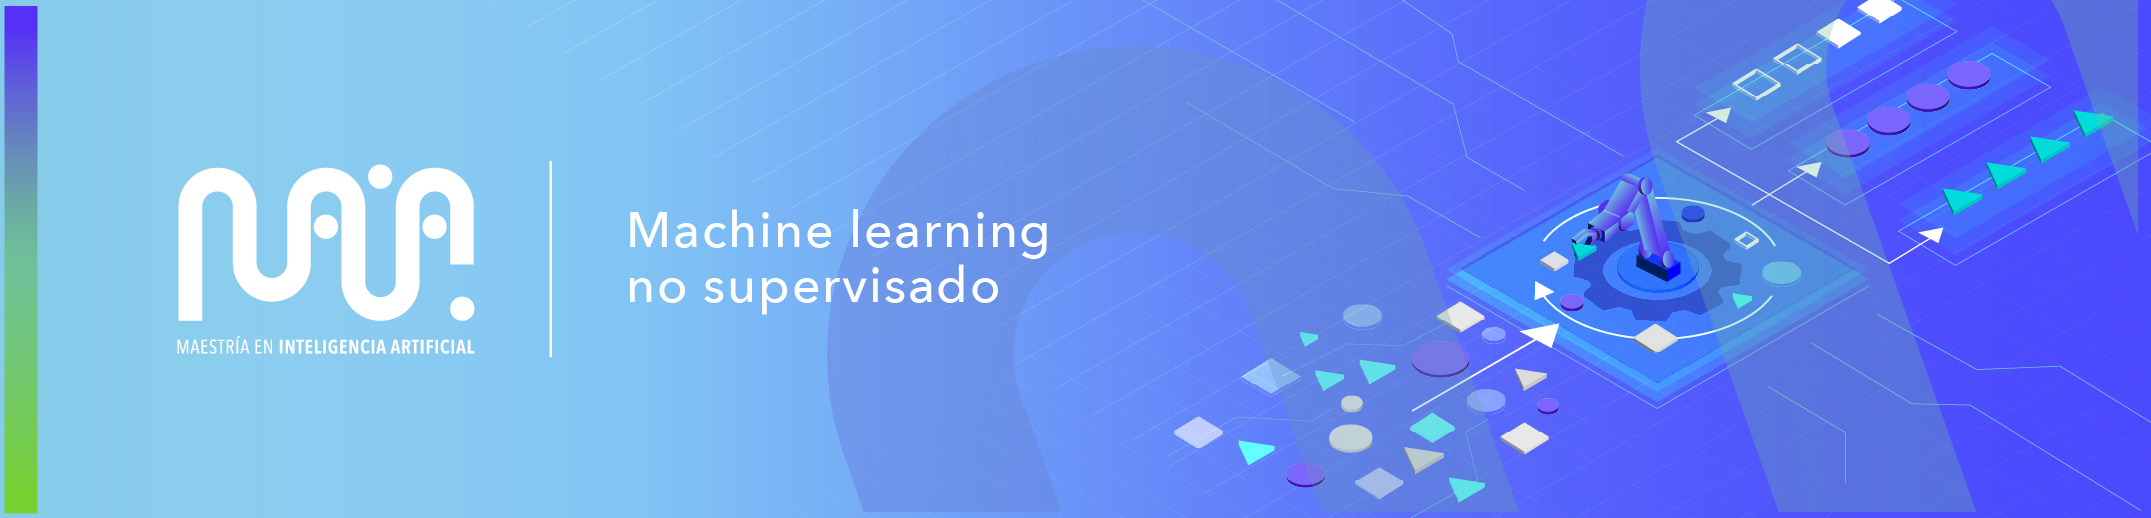

# Solución Microproyecto 1

1. [Importar las librerías necesarias.](#1.-Importar-las-librerías-necesarias)
2. [Carga y preprocesamiento de las imagenes.](#2.-Carga-y-procesamiento-de-las-imagenes)
3. [Construcción del modelo de agrupación.](#3.-Selección-del-hiperparámetro-K)
4. [Generar el dendrograma.](#4.-Generación-del-dendrograma)
5. [Interpretar los grupos resultantes del mejor modelo.](#5.-Interpretación-de-los-grupos-resultantes-del-mejor-modelo)

<font size="3">**Contexto**  

<font size="2">**Generación de paleta de colores a partir de imágenes con técnicas de machine learning no supervisado.** <br>

En un contexto de amplia demanda de herramientas que puedan asistir a diseñadores gráficos, directores de arte, pintores y creadores de contenido, entre otros, para la selección rápida y adecuada de los colores apropiados para sus obras, una aplicación para configurar paletas de colores a partir de imágenes sería de mucha utilidad.<br>
Los datos en este caso serán imágenes de obras de arte, las cuales son extraidas de un [repositorio](https://www.kaggle.com/datasets/steubk/wikiart) público.

Algoritmos de agrupación considerados:

- KMeans
- KMedoids
- MeanShift
- DBSCAN



Se seleccionaron 5 imágenes con las cuales se realizará el entrenamiento y la validación del modelo, estas imágenes contienen una variedad de colores y estilos que pondrán a prueba el modelo de agrupación, las imágenes son **martins_baiana-1980**(Primitivismo), **adolphe-joseph-thomas-monticelli_empress-eugenie-and-her-attendants**(Romanticismo), **andre-derain_charing-cross-bridge-1906**(Puntillismo), **andrea-del-castagno_giovanni-boccaccio**(Renacimiento) y **hiroshige_bay-at-kominato-in-awa-province**(Ukiyo-e) y se muestran a continuación en el orden mencionado:

<div style="display: flex; gap: 15px;">
    <img src="data/aldemir-martins_baiana.jpg" style="width: 18%;">
    <img src="data/adolphe-joseph-thomas-monticelli.jpg" style="width: 18%;">
    <img src="data/andre-derain_charing-cross-bridge-1906.jpg" style="width: 18%;"> 
    <img src="data/andrea-del-castagno_giovanni-boccaccio.jpg" style="width: 18%;">
    <img src="data/hiroshige_bay-at-kominato-in-awa-province.jpg" style="width: 18%;">
</div>


1. Importar las librerías necesarias

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn_extra.cluster import KMedoids


2. Carga y preprocesamiento de las imágenes

    En este paso se creará el pipeline de carga y preparación de las imágenes de la siguiente manera:

    1. Se carga la imagen en formato JPG a un arreglo NumPy con dimensiones (alto, ancho, 3) y que contiene información de la imagen y sus píxeles en formato de color BGR.
    2. Para facilitar el procesamiento y por eficiencia computacional, se reduce el tamaño de la imagen a la mitad en cada eje.
    3. Se convierte la imagen de formato BGR a RGB.
    4. Se reorganiza la imagen procesada en RGB en un arreglo de 2 dimensiones donde cada fila representa un píxel con sus tres canales de color RGB en un arreglo.
    5. Se realiza normalización de los valores de RGB [0 - 255] al rango [0 - 1], esto es especialmente útil cuando se usa un algoritmo que usa distancias para calcular la similitud y pertenencia a un cluster.
    6. Se agrupan las imágenes dentro de una lista de imágenes que ya está lista para ser procesada por un algoritmo de agrupación.

In [2]:
def data_preparation_pipeline(root_path, file_names):
    image_list = list()
    
    for file in file_names:
        original_image = cv2.imread(os.path.join(root_path, file))
        processed_image = cv2.resize(original_image, None, fx=0.5, fy=0.5)
        processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
        processed_image = processed_image.reshape((-1, 3))
        processed_image = processed_image / 255.0
        image_list.append(processed_image)
        
    return image_list

Se leen los nombres de las imagenes que vamos a procesar, que estan ubicadas en la carpeta 'data'.

In [3]:
root_path = 'data'

In [4]:
images_names = os.listdir(root_path)
images_names

['andre-derain_charing-cross-bridge-1906.jpg',
 'hiroshige_bay-at-kominato-in-awa-province.jpg',
 'adolphe-joseph-thomas-monticelli.jpg',
 'aldemir-martins_baiana.jpg',
 'andrea-del-castagno_giovanni-boccaccio.jpg']

In [6]:
preprocessed_images = data_preparation_pipeline(root_path, images_names)
preprocessed_images

[array([[0.92941176, 0.52156863, 0.62745098],
        [0.95686275, 0.54901961, 0.65490196],
        [0.99607843, 0.59215686, 0.68627451],
        ...,
        [0.6       , 0.53333333, 0.4627451 ],
        [0.50196078, 0.44705882, 0.3372549 ],
        [0.50196078, 0.44705882, 0.32941176]]),
 array([[0.98431373, 0.97254902, 0.85098039],
        [0.9372549 , 0.92156863, 0.80784314],
        [0.94901961, 0.94509804, 0.83137255],
        ...,
        [0.92941176, 0.90196078, 0.80392157],
        [0.91764706, 0.89019608, 0.78823529],
        [0.9254902 , 0.89803922, 0.79607843]]),
 array([[0.07058824, 0.08627451, 0.12156863],
        [0.07058824, 0.08627451, 0.12156863],
        [0.09803922, 0.11372549, 0.14901961],
        ...,
        [0.23921569, 0.24313725, 0.25882353],
        [0.25490196, 0.25882353, 0.2745098 ],
        [0.25098039, 0.25490196, 0.27058824]]),
 array([[0.93333333, 0.97647059, 0.97254902],
        [0.93333333, 0.98039216, 0.97254902],
        [0.9254902 , 0.97254902, 0.

In [7]:
preprocessed_images[0].shape

(592878, 3)

3. Construcción del modelo de agrupación

In [ ]:
num_clusters = 7

In [ ]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(img_list[0])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_ * 255.0
centroids

array([[212.20832875, 224.01358167, 235.77502522],
       [193.13470708,  58.98388076,  57.3837075 ],
       [ 39.94167143,  79.59902676, 144.90215959],
       [ 52.42334499,  53.93979334,  57.70902829],
       [186.1466425 , 148.47009322, 100.26286035],
       [176.51543474, 194.87897221, 212.75837743],
       [123.99530756,  86.80442491,  71.88003482]])

In [ ]:
indexes, values = np.unique(kmeans.labels_, return_counts=True)

combined_dict = {
    indexes[i]: (values[i], centroids[i]) for i in range(len(indexes))
}

sorted_dict = dict(sorted(
     combined_dict.items(),
    key=lambda item: item[1][0],
    reverse=True
))

sorted_dict

{0: (209060, array([212.20832875, 224.01358167, 235.77502522])),
 1: (135044, array([193.13470708,  58.98388076,  57.3837075 ])),
 5: (94806, array([176.51543474, 194.87897221, 212.75837743])),
 2: (91023, array([ 39.94167143,  79.59902676, 144.90215959])),
 6: (47121, array([123.99530756,  86.80442491,  71.88003482])),
 3: (36740, array([52.42334499, 53.93979334, 57.70902829])),
 4: (23308, array([186.1466425 , 148.47009322, 100.26286035]))}

In [ ]:
def display_color_palette(colors, size=(300, 50)):
    """Muestra una paleta de colores en una imagen horizontal."""
    n_colors = len(colors)
    palette_img = np.zeros((size[1], size[0], 3), dtype=np.uint8)
    width_per_color = size[0] // n_colors

    for i, color in enumerate(colors):
        start = i * width_per_color
        end = (i + 1) * width_per_color
        palette_img[:, start:end, :] = color

    plt.figure(figsize=(8, 2))
    plt.axis('off')
    plt.imshow(palette_img)
    plt.show()

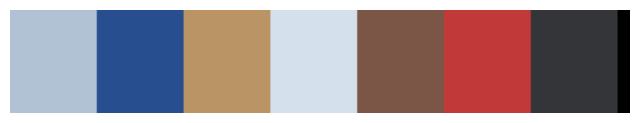

In [ ]:
display_color_palette(centroids)

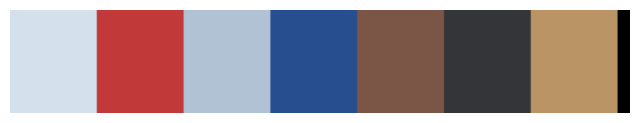

In [ ]:
rgb_arrays = [v[1] for v in sorted_dict.values()]

# Call function
display_color_palette(rgb_arrays)